# UNDERSTANDING `CORRELATION` MATRIX

## Topic Involved


1. Loading a dataset
- using `pandas` to read datasets (csv,excel,etc) into a dataframe

2. Numerical Columns
- columns containing numeric data that can be used for correlation analysis.

3. Correlation Matrix
 - Measures the linear relationship between two numerical variables
 - Values ranges from -1 to 1
    - 1 : perfect positive correlation
    - -1 : perfect negative correlation
    - 0 : No Correlation

### Common Methods : 
 - `pearson` : (default ,linear correlation)
 - `spearman` : (rank correlation,non-linear)
 - `kendall` : (non-parametric,rank-based)


 #### use case of correlation matrix:
 1. ML : feature selection
    - if any two features have high correlation , then we can drop one of them, because are  giving the same value.
 2. Data analysis : pattern 
    - which variables are closely related two each other.
    

4. Heatmap visualization : 
- using `seaborn` or `matplotlib` to visually represent correlations.
- strong correlations (positive or negative) can help in feature selection or detecting multicollinearity.

5. Identifying highly correlated features :
- features with correlation above a threshold (0.7 or -0.7) are considered highly correlated.

# code part :

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = {
    'Age': [25, 30, 35, 40, 45, 50, 55, 60],
    'Salary': [30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000],
    'Experience': [1, 3, 5, 7, 9, 11, 13, 15],
    'Hours_Worked': [40, 42, 41, 43, 45, 44, 46, 47]
}

In [6]:
df = pd.DataFrame(data)

In [7]:
df.head()

,Age,Salary,Experience,Hours_Worked
0,25,30000,1,40
1,30,35000,3,42
2,35,40000,5,41
3,40,45000,7,43
4,45,50000,9,45


In [8]:
df.describe()

,Age,Salary,Experience,Hours_Worked
count,8.000000,8.000000,8.000000,8.00000
mean,42.500000,47500.000000,8.000000,43.50000
std,12.247449,12247.448714,4.898979,2.44949
min,25.000000,30000.000000,1.000000,40.00000
25%,33.750000,38750.000000,4.500000,41.75000
50%,42.500000,47500.000000,8.000000,43.50000
75%,51.250000,56250.000000,11.500000,45.25000
max,60.000000,65000.000000,15.000000,47.00000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Age           8 non-null      int64
 1   Salary        8 non-null      int64
 2   Experience    8 non-null      int64
 3   Hours_Worked  8 non-null      int64
dtypes: int64(4)
memory usage: 388.0 bytes


In [11]:
numerical_cols=df.select_dtypes(include=['int64','float64'])

In [12]:
corr_matrix= numerical_cols.corr()


In [13]:
corr_matrix

,Age,Salary,Experience,Hours_Worked
Age,1.000000,1.000000,1.000000,0.952381
Salary,1.000000,1.000000,1.000000,0.952381
Experience,1.000000,1.000000,1.000000,0.952381
Hours_Worked,0.952381,0.952381,0.952381,1.000000


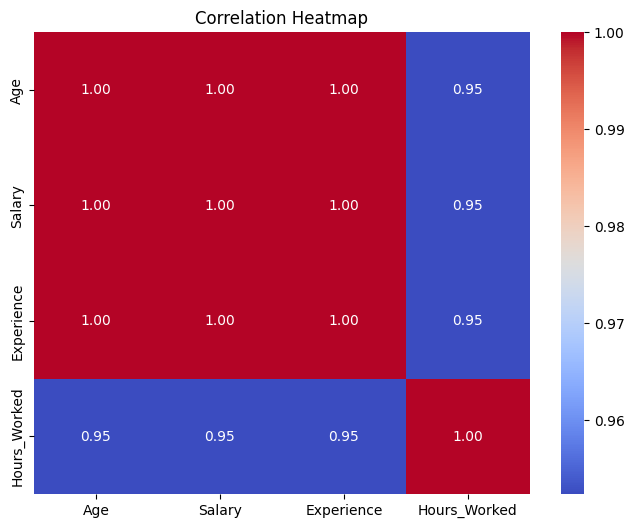

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [18]:
threshold = 0.7
high_corr = corr_matrix[(corr_matrix > threshold) & (corr_matrix != 1.0)].stack().reset_index()
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
print("\nHighly Correlated Features (>|0.7|):\n", high_corr)


Highly Correlated Features (>|0.7|):
       Feature 1     Feature 2  Correlation
0           Age  Hours_Worked     0.952381
1        Salary  Hours_Worked     0.952381
2    Experience  Hours_Worked     0.952381
3  Hours_Worked           Age     0.952381
4  Hours_Worked        Salary     0.952381
5  Hours_Worked    Experience     0.952381
